In [3]:
# 1. Introduction
print('Hello world!')

Hello world!


In [4]:
# Define variables
speaker = 'Mike Ovchinnikov'

In [5]:
duration = 120

In [6]:
print("Today's speaker is", speaker)
print("duration of streaming is", duration)

Today's speaker is Mike Ovchinnikov
duration of streaming is 120


In [7]:
# Create a formatted string:

print(f"Today's speaker is {speaker}, duration of streaming is {duration}") 

Today's speaker is Mike Ovchinnikov, duration of streaming is 120


In [8]:
# Change variables and show the new output

speaker += ' (Michael)' # add to string 
duration_hours = duration/60
print(f"Today's speaker is {speaker}, duration of streaming is {duration_hours}") 

Today's speaker is Mike Ovchinnikov (Michael), duration of streaming is 2.0


In [9]:
# 2. Project, 1 part 
# Import libraries

import pandas as pd

In [10]:
# Import data

trips = pd.read_excel('tripsdata.xlsx')
trips = trips.loc[0:999, 'salary':'target']

In [11]:
trips.head() # show first 5 rows of the file

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Krasnodar,25,shopping,car,1,New York
1,152000,Yekaterinburg,60,architecture,plane,1,London
2,83000,Tomsk,49,architecture,car,2,Sydney
3,161000,Krasnodar,41,shopping,car,0,New York
4,146000,Krasnodar,58,architecture,plane,1,Sydney


In [12]:
# Stat description of the data
trips.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


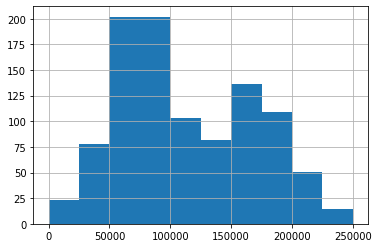

In [13]:
# Look at the histogram for salaries
trips.salary.hist() 

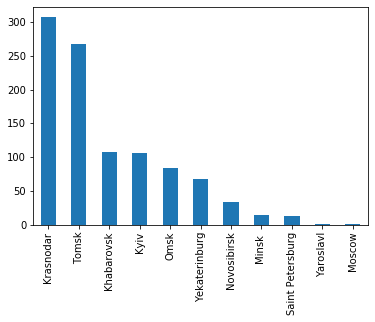

In [14]:
# We can look at the frequency of the cities and display it on a bar chart
trips.city.value_counts().plot(kind='bar')

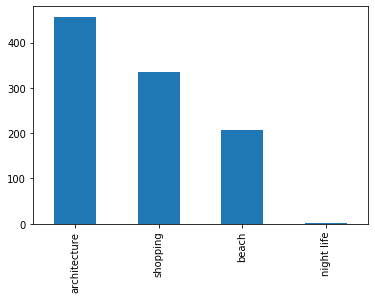

In [15]:
# We can look at the frequency of vacation preferences and display it on a bar chart
trips.vacation_preference.value_counts().plot(kind='bar')

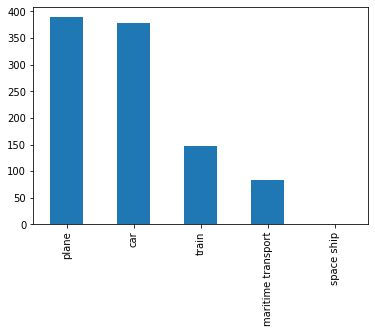

In [16]:
# We can look at the frequency of the transport preferences and display it on a bar chart
trips.transport_preference.value_counts().plot(kind='bar')

In [17]:
# For predictions we need to change variable types from strings to integers
# we use get_dummies to transfer variables to a set of dummies
trips_updated = pd.get_dummies(trips, columns=['city', 'vacation_preference', 'transport_preference'])

In [18]:
trips_updated.head()

,salary,age,family_members,target,city_Khabarovsk,city_Krasnodar,city_Kyiv,city_Minsk,city_Moscow,city_Novosibirsk,...,city_Yekaterinburg,vacation_preference_architecture,vacation_preference_beach,vacation_preference_night life,vacation_preference_shopping,transport_preference_car,transport_preference_maritime transport,transport_preference_plane,transport_preference_space ship,transport_preference_train
0,196000,25,1,New York,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [19]:
# We can already build an easy prediction model 
# for that we should define input and output for our prediction model:
input_data =  trips_updated.drop("target", axis = 1) #include all the variables but target
target = trips_updated.target
input_data

,salary,age,family_members,city_Khabarovsk,city_Krasnodar,city_Kyiv,city_Minsk,city_Moscow,city_Novosibirsk,city_Omsk,...,city_Yekaterinburg,vacation_preference_architecture,vacation_preference_beach,vacation_preference_night life,vacation_preference_shopping,transport_preference_car,transport_preference_maritime transport,transport_preference_plane,transport_preference_space ship,transport_preference_train
0,196000,25,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,83000,49,2,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81000,55,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
996,96000,32,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
997,56000,68,2,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
998,162000,69,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [20]:
# We import the Random Forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier()

In [22]:
# we teach the model 
model.fit(input_data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
# which var influence target the most
model.feature_importances_

array([2.37943881e-01, 1.92456451e-01, 1.67430225e-01, 1.29520373e-02,
       2.12618947e-02, 1.50367596e-02, 3.95653817e-03, 7.97497488e-05,
       6.98995548e-03, 1.27546782e-02, 1.56815148e-03, 1.91309077e-02,
       3.28543842e-04, 1.64787305e-02, 3.05858539e-02, 3.38919698e-02,
       1.36030732e-04, 6.85278185e-02, 4.02881770e-02, 2.19711423e-02,
       6.34234730e-02, 2.42371160e-04, 3.25646589e-02])

In [24]:
# we retrieve all the characteristics with the input values of 0 and
# copy the output for model testing 
{col:0 for col in input_data.columns}

{'salary': 0,
 'age': 0,
 'family_members': 0,
 'city_Khabarovsk': 0,
 'city_Krasnodar': 0,
 'city_Kyiv': 0,
 'city_Minsk ': 0,
 'city_Moscow': 0,
 'city_Novosibirsk': 0,
 'city_Omsk': 0,
 'city_Saint Petersburg': 0,
 'city_Tomsk': 0,
 'city_Yaroslavl': 0,
 'city_Yekaterinburg': 0,
 'vacation_preference_architecture': 0,
 'vacation_preference_beach': 0,
 'vacation_preference_night life': 0,
 'vacation_preference_shopping': 0,
 'transport_preference_car': 0,
 'transport_preference_maritime transport': 0,
 'transport_preference_plane': 0,
 'transport_preference_space ship': 0,
 'transport_preference_train': 0}

In [25]:
my_example = {'salary': 100000,
 'age': 49,
 'family_members': 3,
 'city_Khabarovsk': 0,
 'city_Krasnodar': 0,
 'city_Kyiv': 0,
 'city_Minsk ': 0,
 'city_Moscow': 0,
 'city_Novosibirsk': 0,
 'city_Omsk': 0,
 'city_Saint Petersburg': 0,
 'city_Tomsk': 1,
 'city_Yaroslavl': 0,
 'city_Yekaterinburg': 0,
 'vacation_preference_architecture': 1,
 'vacation_preference_beach': 0,
 'vacation_preference_night life': 0,
 'vacation_preference_shopping': 0,
 'transport_preference_car': 0,
 'transport_preference_maritime transport': 0,
 'transport_preference_plane': 1,
 'transport_preference_space ship': 0,
 'transport_preference_train': 0}

In [26]:
my_example_dataframe = pd.DataFrame(data=[my_example])

In [27]:
model.predict(my_example_dataframe)

array(['Paris'], dtype=object)